# __Raw Project__

## Project Content

<a id = 0></a>

### First Step: First Organization

1. [Introduction](#1)
2. [Loading libraries and packages to embark our new journey](#2)
3. [Loading and Checking The Dataset](#3)

### Second Step: Data Preprocessing

4. [Exploratory Data Analysis](#4)
5. [Numeric Fields Analysis](#5)
6. [Categorical Fields Analysis](#6)
7. [Feature Scaling](#7)
8. [Correlation Analysis](#8)
9. [Dealing with Outliers](#9)
10. [Determining Distributions of Numeric Fields](#10)
11. [Appllying One Hot Encoding to Categorical Fields](#11)
12. [Feature Scaling with The RobustScaler Method](#12)
13. [Seperating Data into Two Parts of Train and Test](#13)

### Third and Final Step: Modeling

16. [Modelling (Logistic Regression)](#16)
17. [Cross Validation (Logistic Regression)](#17)
18. [AUC-ROC Curve (Logistic Regression)](#18)
19. [Hyper Parameter Optimization (Logistic Regression)](#19)
20. [Modelling (Decision Tree)](#20)
21. [Cross Validation (Decision Tree)](#21)
22. [AUC-ROC Curve (Decision Tree)](#22)
23. [Hyper Parameter Optimization (Decision Tree)](#23)
24. [Modelling (Support Vector Classifier)](#24)
25. [Cross Validation (Support Vector Classifier)](#25)
26. [AUC-ROC Curve (Support Vector Classifier)](#26)
27. [Hyper Parameter Optimization (Support Vector Classifier)](#27)
24. [Modelling (Random Forest)](#28)
25. [Cross Validation (Support Vector Classifier)](#29)
26. [AUC-ROC Curve (Support Vector Classifier)](#30)
27. [Hyper Parameter Optimization (Support Vector Classifier)](#31)

## 1. Introduction <a id = 1></a>

[Project Content](#0)

## 2. Loading packages and Defining Functions to Embark Our New Journey <a id = 2></a>

In [130]:
# Basic Python Packages

import warnings
warnings.filterwarnings("ignore")

# Numpy Library

import numpy as np

# Pandas Library

import pandas as pd

# Visualization Libraries (Matplotlib, Seaborn, Missingno)

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Statsmodels Modules

from statsmodels.stats.outliers_influence import variance_inflation_factor

# SciPy

from scipy.stats import shapiro

# Sklean Modules

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [131]:
def f_num_unique_values(dataframe, fields = None):
    """
    By this function we can check how many unique values each field has

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        fields (list): The fields we want to check number of their unique values
    """
    
    num_unique_values_df = pd.DataFrame(columns = ["Field_Name", "Unique_Values_Num"])

    if fields == None:
        fields = dataframe.columns
        
    num_unique_values = []

    for field in fields:
        
        num_unique_values += [dataframe[field].nunique()]
        
    num_unique_values_df["Field_Name"] = fields
    num_unique_values_df["Unique_Values_Num"] = num_unique_values
        
    return num_unique_values_df

In [132]:
def f_unique_values(dataframe, fields):
    """
    By this function we can get a dataframe and categorical fields and show a dataframe of unique values of each field.

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        fields (list): The fields we want to check their unique values
        
    Returns:
        unique_values_df (pandas.core.frame.DataFrame): A dataframe of fields and their unique values
    """
    
    unique_values_df = pd.DataFrame(columns = ["Field_Name", "Unique_Values"])

    fields_list = []
    unique_values_list = []

    for field in fields:

        fields_list += [field]
        field_unique_values_list = list(dataframe[field].unique())
            
        unique_values_str = ""
            
        for values_str in field_unique_values_list:
            if field_unique_values_list.index(values_str) != len(field_unique_values_list) - 1:
                unique_values_str += str(values_str) + " | "
            else:
                unique_values_str += str(values_str)                 
            
        unique_values_list += [unique_values_str]
        
    unique_values_df["Field_Name"] = fields_list
    unique_values_df["Unique_Values"] = unique_values_list
        
    return unique_values_df

In [133]:
def f_cat_to_int(dataframe, fields = None):
    """
    _summary_

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        fields (list): The fields which we want to duplicate a integer format of them

    Returns:
        dataframe (pandas.core.frame.DataFrame): A dataframe which categorical fields have integer values
    """
    
    if fields == None:
        fields = list(dataframe.columns)
        
    cat_dict = {}

    for field in fields:
        
        cat_dict[field + "_str"] = list(dataframe[field].unique())
        cat_dict[field + "_int"] = [i for i in range(0, len(list(dataframe[field].unique())))]

        dataframe[field + "_int"] = dataframe[field]
        dataframe[field + "_int"].replace(cat_dict[field + "_str"], cat_dict[field + "_int"], inplace = True)
        
    return dataframe

In [134]:
def f_sorted_correlations(dataframe, fields = None, omited_fields = None, target_field = None, cat_num = None):
    """
    This function get a dataframe and fields to create a dataframe of correlation based on our demands.
    It can show a dataframe of correlations between each two fields in a sorted manner and also it can show a one row sorted correlation values between non-target fields and the target.

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        fields (list, optional): The fields we want to check their correlation
        omited_fields (list, optional): The fields we dont want to check their correlation
        target_field (list, optional): The target field we want to check its correlation with other fields
        cat_num (list, optional): The target field we want to check its correlation with other fields
        
    Returns:
        corr_df (pandas.core.frame.DataFrame): Final correlation matrix
    """
    
    if fields == None:
        fields = list(dataframe.columns)
    
    corr_dict = {}
    all_correlation_df = dataframe[fields].corr()
    
    if cat_num == None:
        
        if omited_fields != None:
            all_correlation_df.drop(omited_fields, axis = 0, inplace = True)
            all_correlation_df.drop(omited_fields, axis = 1, inplace = True)
        
        if target_field == None:
            for row in range(0, len(list(all_correlation_df.columns))):
                for column in range(row, len(list(all_correlation_df.columns))):
                    if row < column:
                        corr_dict[f"{list(all_correlation_df.columns)[row]}, {list(all_correlation_df.columns)[column]}"] = all_correlation_df.iloc[row, column]

            corr_df = pd.DataFrame(columns = ["Fields", "Correlation_Value"])

            corr_df["Fields"] = list(corr_dict.keys())
            corr_df["Correlation_Value"] = list(corr_dict.values())
            corr_df.sort_values(by = "Correlation_Value", inplace = True)
            
        else:
            corr_df = all_correlation_df[[target_field]]
            corr_df = corr_df.sort_values(by = target_field)
            corr_df.drop(target_field, axis = 0, inplace = True)
            corr_df = corr_df.T
            
    else:
        
        corr_df = ((dataframe[cat_num[0] + cat_num[1]].corr()[cat_num[0]]).T)[cat_num[1]]

    return corr_df

In [135]:
def f_vif_function(dataframe, omited_fields = None):
    """
    This function show a dataframe with sorted values of VIF of each field.

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        omited_fields (list, optional): The fields we dont want to check their correlation
                
    Returns:
        vif_info (pandas.core.frame.DataFrame): _description_
    """
    
    if omited_fields != None:
        dataframe.drop(omited_fields, axis = 1, inplace = True)
        
    vif_dict = {}
    
    vif_dict["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif_df = ((pd.DataFrame(vif_dict, index = dataframe.columns)).sort_values(by = "VIF").T)
    
    return vif_df

In [136]:
def f_train_dev_split(dataframe, target_field):
    """
    _summary_

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        target_field (sring): The field we want to create the linear regression model based on that

    Returns:
        x_train, x_develop, y_train, y_develop (pandas.core.frame.DataFrame): Anything we want for modeling
    """
    
    x = dataframe.drop([target_field], axis = 1)
    y = dataframe[target_field]
    
    x_train, x_develop, y_train, y_develop = train_test_split(x, y, test_size = 0.20, random_state = 3)

    print(f"Train (x) dataset shape is:      {x_train.shape}")
    print(f"Train (y) dataset shape is:      {y_train.shape}")

    print(f"Dev (x) dataset shape is:       {x_develop.shape}")
    print(f"Dev (y) dataset shape is:       {y_develop.shape}")
    
    return x_train, x_develop, y_train, y_develop

In [267]:
def f_linear_regression(train , dev):
    """
    This function has been defined to model a linear regression and show R squared value of train and development datasets.

    Args:
        train (list): A list of both x and y dataframes for training the model
        dev (list): A list of both x and y dataframes for checking the model

    Returns:
        results (pandas.core.frame.DataFrame): R squared value of the model of both train and dev datasets
    """
    
    model = LinearRegression()
    model.fit(train[0], train[1])
    
    results = pd.DataFrame(columns = ["Train", "Dev"], index = ["R Squared"])
    results["Train"] = [model.score(train[0], train[1])]
    results["Dev"] = [model.score(dev[0], dev[1])]
    
    fields = list((train[0]).columns)
    coefficients = list(model.coef_)
    coefficients_dict = {fields[i]: coefficients[i] for i in range(len(fields))}
    sorted_coefficients_dict = sorted(coefficients_dict.items(), key = lambda x : x[1])
    
    intercept = model.intercept_
    
    print(f"Coefficients values:")
    
    for i in range(len(fields)):
        print(f"    * {sorted_coefficients_dict[i][0]} : {round((sorted_coefficients_dict[i][1]), 2)}")
    
    print(f"\nInetrcept: {model.intercept_}\n")
    
    return results

[Project Content](#0)

## 3. Loading and Checking The Dataset <a id = 3></a>

### Loading The Dataset

In [138]:
df = pd.read_csv("Car-Dataset.csv")

### Checking The Dataset

In [139]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Examining Missing Values

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Examining Number of Unique Values

In [141]:
f_num_unique_values(df)

,Field_Name,Unique_Values_Num
0,Car_Name,98
1,Year,16
2,Selling_Price,156
3,Present_Price,147
4,Kms_Driven,206
5,Fuel_Type,3
6,Seller_Type,2
7,Transmission,2
8,Owner,3


### Deleting Car Name Column

In [142]:
del df["Car_Name"]

df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Separating Fields to Numerical and Categorical

In [143]:
fields_list = list(df.columns)
cat_f = ["Fuel_Type", "Seller_Type", "Transmission", "Owner"]
num_f = fields_list

for column in cat_f:
    num_f.remove(column)

print("Categorical fields are:      ", cat_f)
print("Numerical fields are:        ", num_f)

Categorical fields are:       ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
Numerical fields are:         ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']


[Project Content](#0)

## 4. Exploratory Data Analysis <a id = 4></a>

### Examining Statistics of Numeric Fields

In [144]:
df[num_f].describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


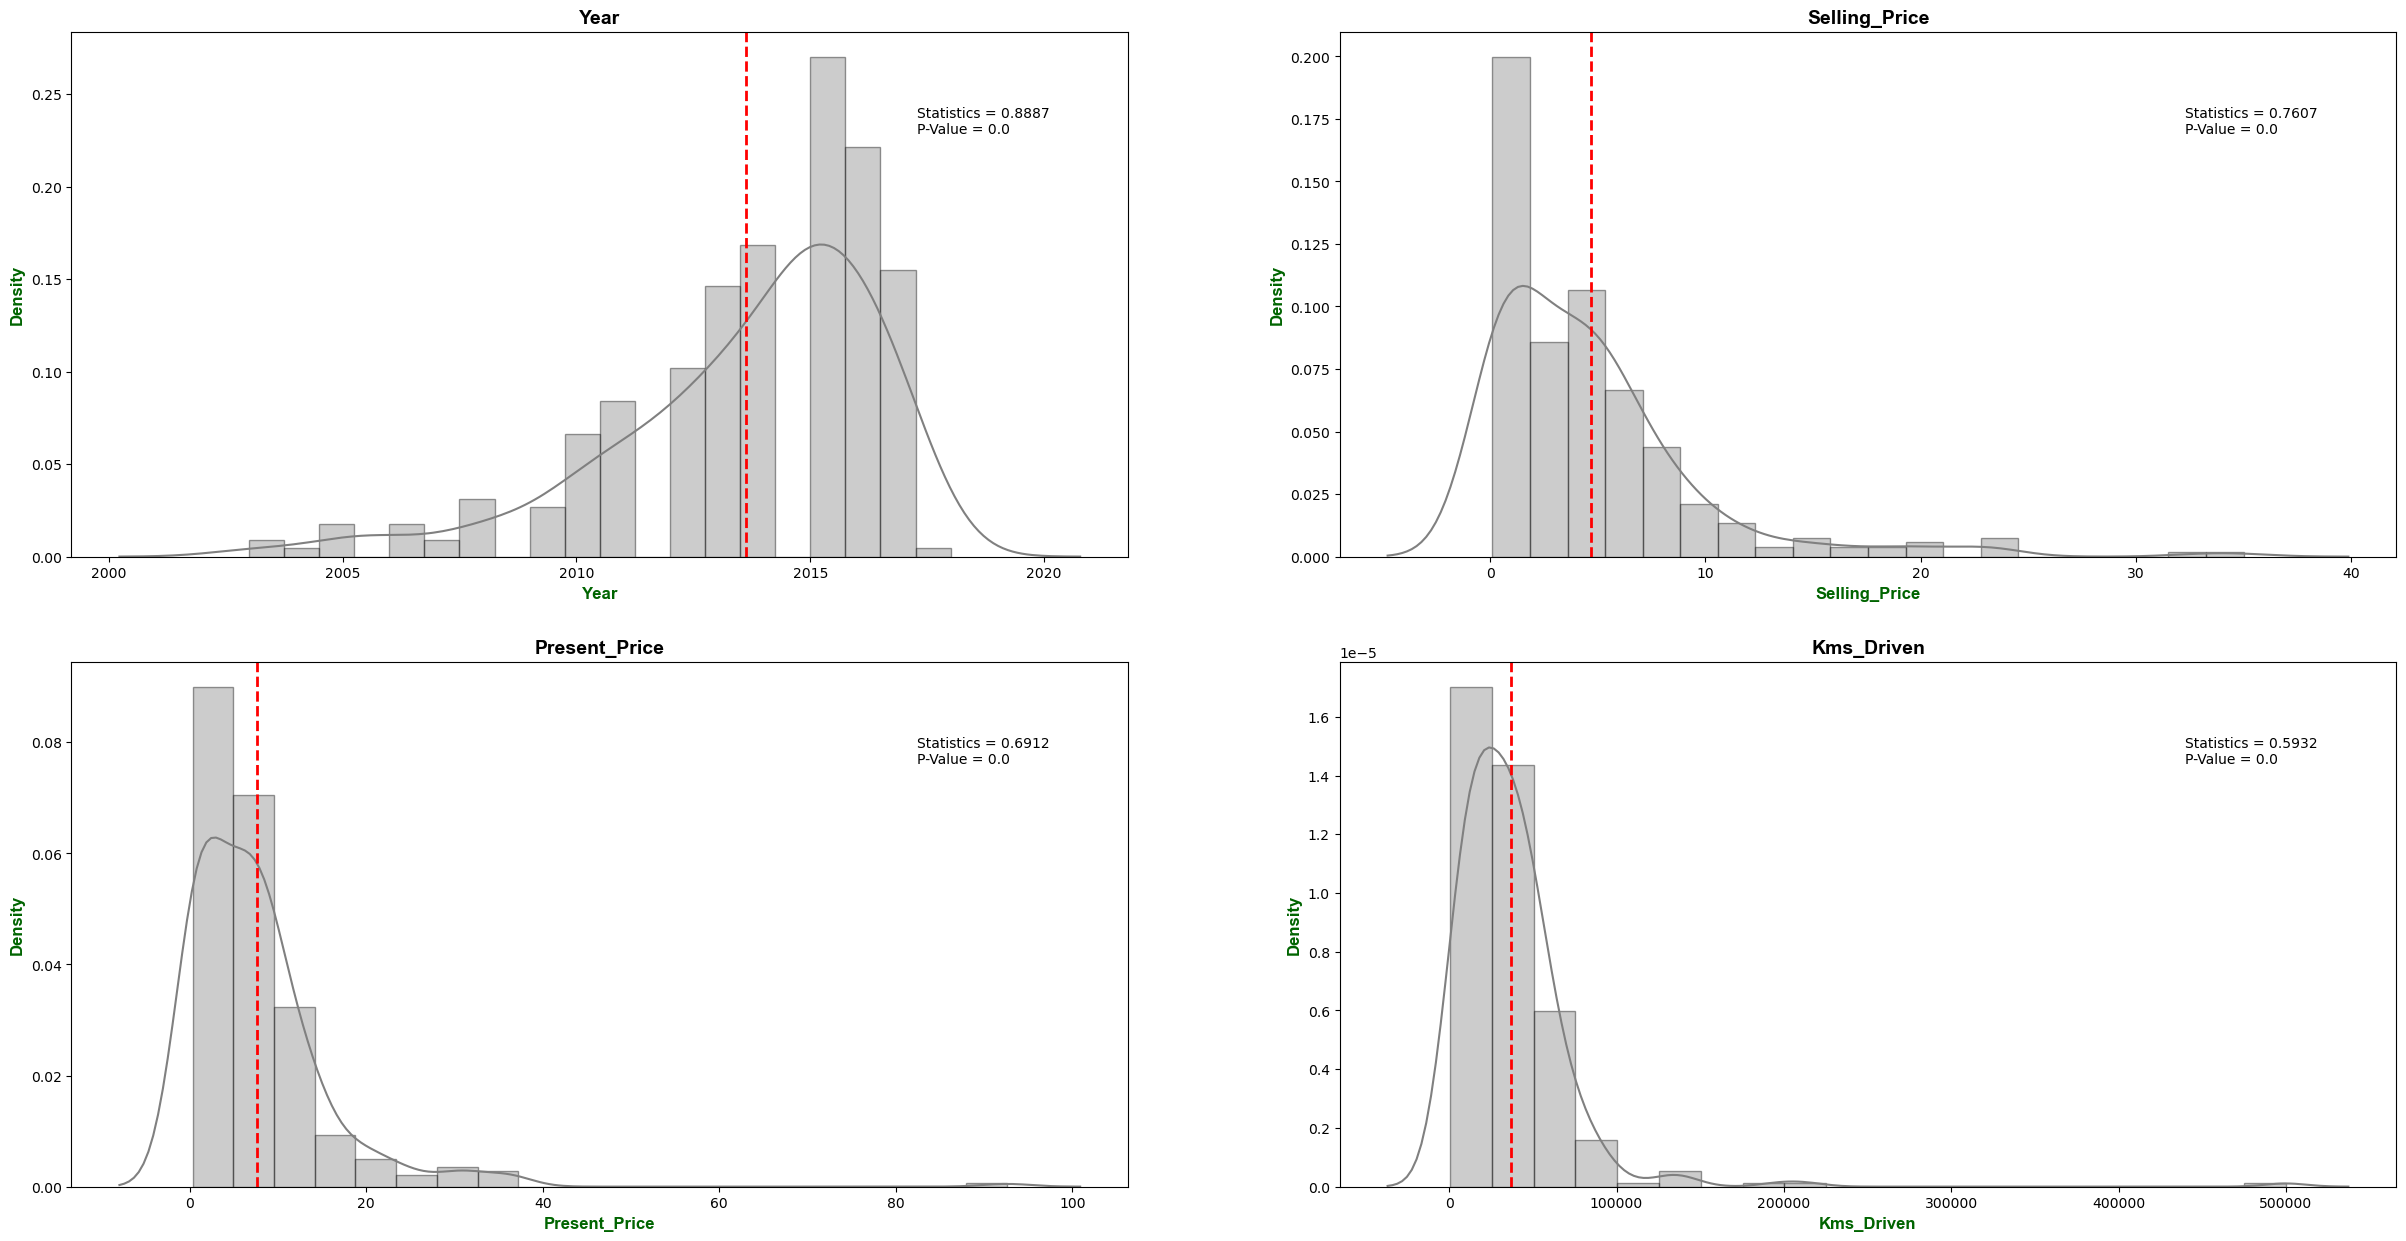

In [145]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

figure, axis = plt.subplots(2, 2, figsize = (30, 15))

i = 0
j = 0

for field in num_f:
    
    sns.distplot(df[field], kde = True, bins = 20, color = "gray", hist_kws = dict(linewidth = 1, edgecolor = "k"), ax = axis[i, j])
    axis[i, j].axvline(df[field].mean(), color = "r", ls = "--", lw = 2)
                
    axis[i, j].set_title(field, fontdict = title_font)
    axis[i, j].set_xlabel(field, fontdict = axes_font)
    axis[i, j].set_ylabel("Density", fontdict = axes_font)
    axis[i, j].annotate(f"Statistics = {round(shapiro(df[field])[0], 4)}\nP-Value = {round(shapiro(df[field])[1], 4)}",
               xy = (0.8, 0.8), xycoords = "axes fraction", fontsize = 10, horizontalalignment = "left", verticalalignment = "bottom")
    
    if ((j + 1) % 2) != 0:
        j += 1
    
    else:
        j = 0
        i += 1
  
plt.show()

### Examining Statistics of Categorical Fields

In [146]:
f_unique_values(df, cat_f)

,Field_Name,Unique_Values
0,Fuel_Type,Petrol | Diesel | CNG
1,Seller_Type,Dealer | Individual
2,Transmission,Manual | Automatic
3,Owner,0 | 1 | 3


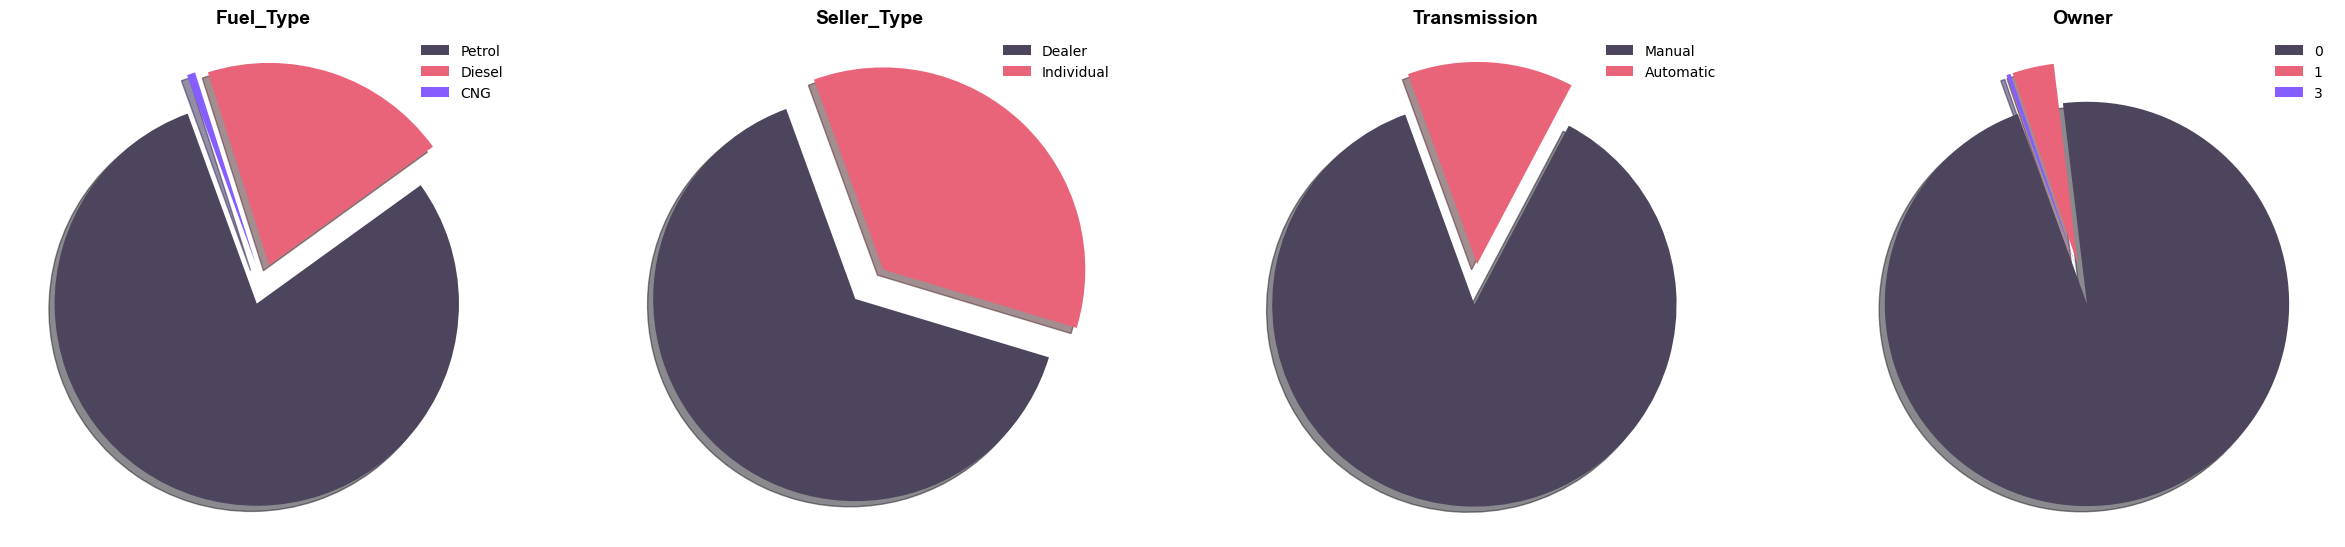

In [147]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
text_font = {"family" : "arial", "color" : "k", "size" : 10}

colors = ["#4D455D", "#E96479", "#865DFF"]
explode = (0.1,)

figure, axis = plt.subplots(1, 4, figsize = (30, 40))

for field in cat_f:
    
    field_unique_values_list = list(df[field].unique())
    i = cat_f.index(field)
    
    axis[i].pie((np.array(df[field].value_counts())),
                labeldistance = 100, startangle = 110, colors = colors, shadow = True,
                explode = explode * len(np.array(df[field].value_counts())))
    
    axis[i].set_title(field, fontdict = title_font)
    axis[i].legend(field_unique_values_list, loc = "upper right", frameon = False)
  
plt.show()

[Project Content](#0)

## 8. Adding an Integer Field for Each Categorical Field <a id = 8></a> 

In [148]:
df = f_cat_to_int(df, fields = cat_f[:-1])

df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_int,Seller_Type_int,Transmission_int
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1,0,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0,0,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0,0,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1,0,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              301 non-null    int64  
 1   Selling_Price     301 non-null    float64
 2   Present_Price     301 non-null    float64
 3   Kms_Driven        301 non-null    int64  
 4   Fuel_Type         301 non-null    object 
 5   Seller_Type       301 non-null    object 
 6   Transmission      301 non-null    object 
 7   Owner             301 non-null    int64  
 8   Fuel_Type_int     301 non-null    int64  
 9   Seller_Type_int   301 non-null    int64  
 10  Transmission_int  301 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 26.0+ KB


In [150]:
cat_f_int = [i + "_int" for i in cat_f[:-1]] + [cat_f[-1]]

cat_f_int

['Fuel_Type_int', 'Seller_Type_int', 'Transmission_int', 'Owner']

[Project Content](#0)

## 8. Correlation Analysis <a id = 8></a> 

### Analysis between Numeric Fields Among Themselves

In [151]:
f_sorted_correlations(df, num_f, omited_fields = "Selling_Price")

,Fields,Correlation_Value
1,"Year, Kms_Driven",-0.524342
0,"Year, Present_Price",-0.047584
2,"Present_Price, Kms_Driven",0.203647


### Correlation Analysis between Numeric Fields and Target

In [152]:
f_sorted_correlations(df, num_f, target_field = "Selling_Price")

,Kms_Driven,Year,Present_Price
Selling_Price,0.029187,0.236141,0.878983


### Correlation Analysis between Categorical Among Themselves

In [153]:
f_sorted_correlations(df, fields = cat_f_int)

,Fields,Correlation_Value
0,"Fuel_Type_int, Seller_Type_int",-0.352415
3,"Seller_Type_int, Transmission_int",-0.063240
2,"Fuel_Type_int, Owner",-0.055705
5,"Transmission_int, Owner",0.050316
1,"Fuel_Type_int, Transmission_int",0.080466
4,"Seller_Type_int, Owner",0.124269


### Correlation Analysis between Categorical Fields and Target

In [154]:
f_sorted_correlations(df, cat_f_int + ["Selling_Price"], target_field = "Selling_Price")

,Seller_Type_int,Owner,Transmission_int,Fuel_Type_int
Selling_Price,-0.550724,-0.088344,0.367128,0.509467


### Numeric and Categorical Fields Correlation Analysis

In [155]:
f_sorted_correlations(df, cat_num = [cat_f_int, num_f])

,Year,Selling_Price,Present_Price,Kms_Driven
Fuel_Type_int,0.053643,0.509467,0.440415,0.166801
Seller_Type_int,-0.039896,-0.550724,-0.512030,-0.101419
Transmission_int,-0.000394,0.367128,0.348715,0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216


In [156]:
f_vif_function(df[num_f + cat_f_int], omited_fields = ["Selling_Price"])

,Owner,Transmission_int,Fuel_Type_int,Kms_Driven,Seller_Type_int,Present_Price,Year
VIF,1.065787,1.36193,1.620168,2.042232,2.229093,3.164007,4.427574


### Making Decision About Fields to Keep

In [157]:
correlated_f = ["Year", "Present_Price", "Kms_Driven", "Fuel_Type_int", "Seller_Type_int", "Transmission_int"]

[Project Content](#0)

## 9. Dealing with Outliers <a id = 9></a> 

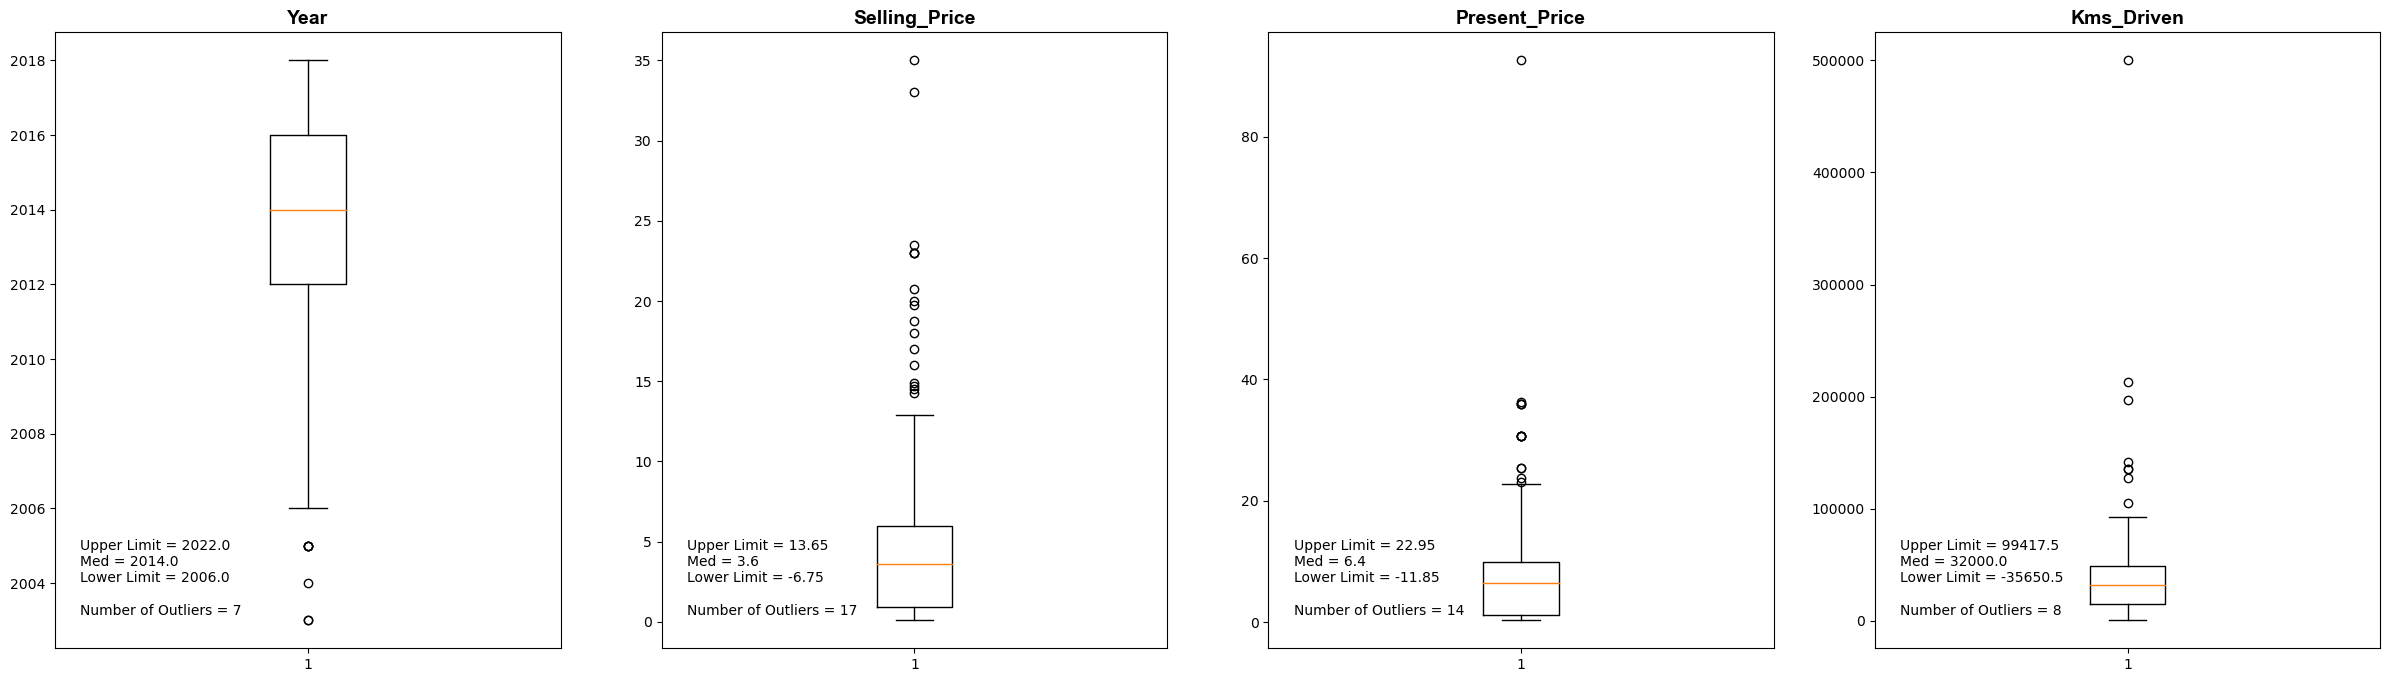

In [158]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
text_font = {"family" : "arial", "color" : "k", "size" : 10}

figure, axis = plt.subplots(1, 4, figsize = (30, 8))
outliers_index_list = []

for field in num_f:
    
    i = num_f.index(field)
    q1 = df[field].quantile(q = 0.25)
    q3 = df[field].quantile(q = 0.75)
    iqr = q3 - q1
    u = round(q3 + 1.5 * iqr, 2)
    l = round(q1 - 1.5 * iqr, 2)
    
    outliers_df = pd.concat([df[df[field] > u], df[df[field] < l]])
    outliers_index_list += list(outliers_df.index)
    
    axis[i].boxplot(df[field])
    axis[i].set_title(field, fontdict = title_font)
    axis[i].annotate(f"""Upper Limit = {u}\nMed = {df[field].median()}\nLower Limit = {l}\n\nNumber of Outliers = {len(outliers_df)}""",
                     xy = (0.05, 0.05), xycoords = "axes fraction", fontsize = 10, horizontalalignment = "left", verticalalignment = "bottom")
    
plt.show()

In [159]:
outliers_index_list = list(set(outliers_index_list))

print("Number of outliers that have a very high or very low value in all numerical fields:  ", len(outliers_index_list))

Number of outliers that have a very high or very low value in all numerical fields:   27


In [160]:
no_ol_df = df.drop(index = outliers_index_list)

no_ol_df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_int,Seller_Type_int,Transmission_int
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0


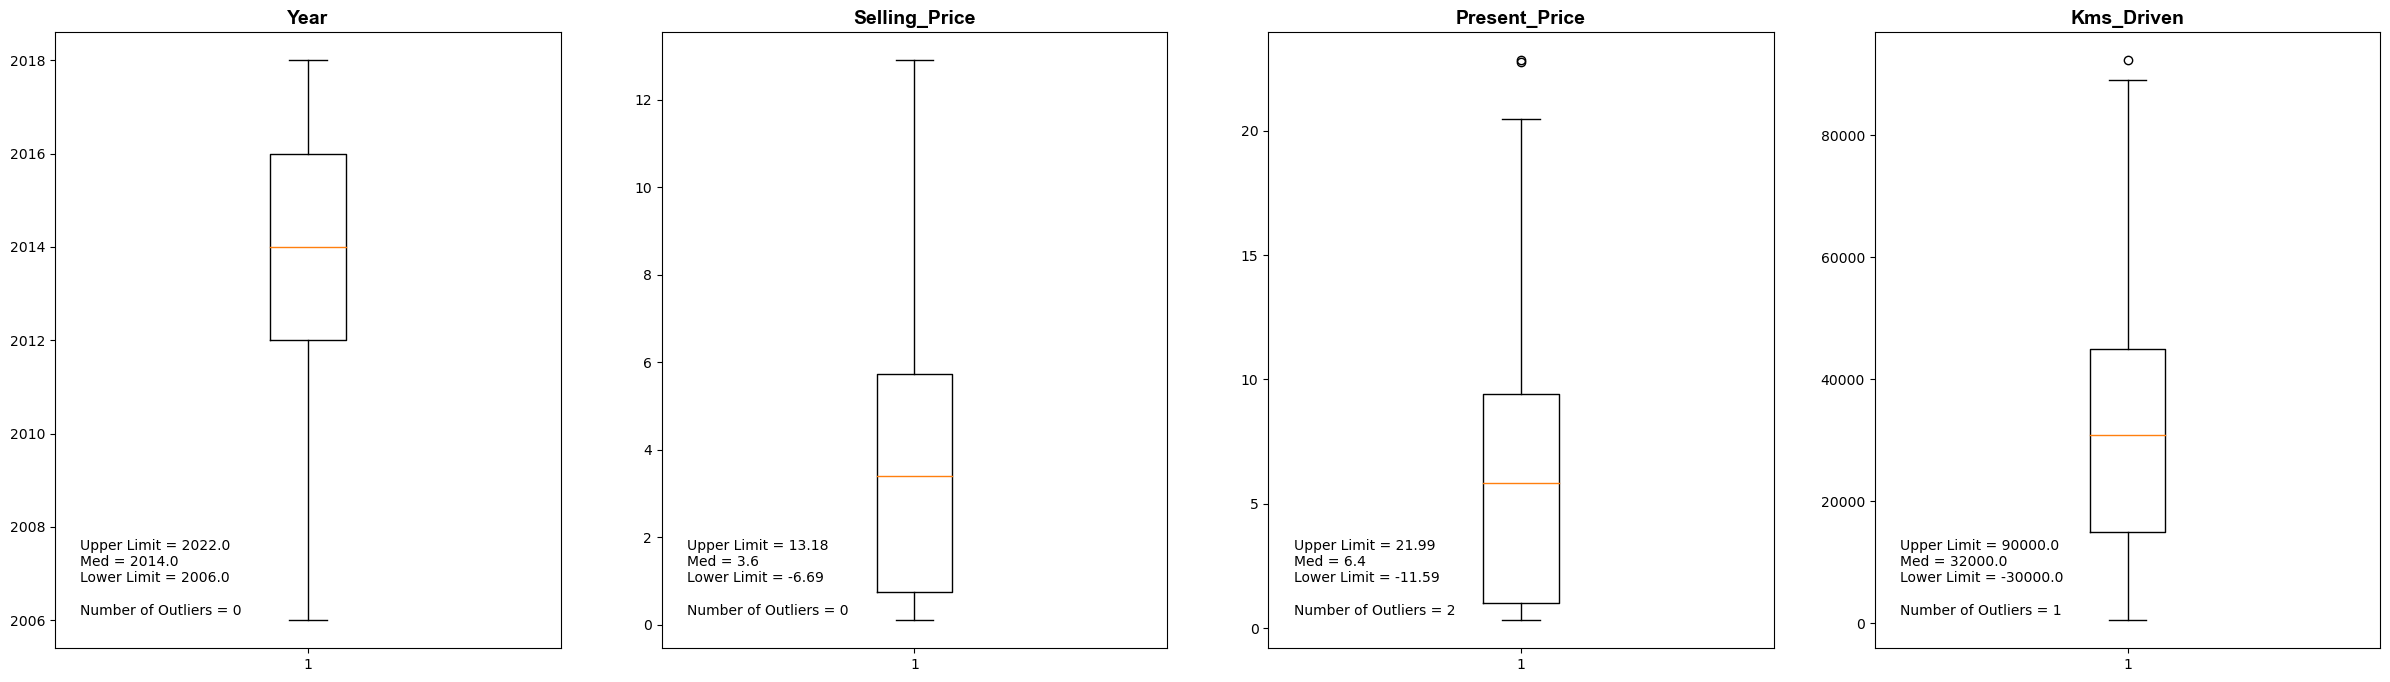

In [161]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
text_font = {"family" : "arial", "color" : "k", "size" : 10}

figure, axis = plt.subplots(1, 4, figsize = (30, 8))

for field in num_f:
    
    i = num_f.index(field)
    q1 = no_ol_df[field].quantile(q = 0.25)
    q3 = no_ol_df[field].quantile(q = 0.75)
    iqr = q3 - q1
    u = round(q3 + 1.5 * iqr, 2)
    l = round(q1 - 1.5 * iqr, 2)
    
    outliers_df = pd.concat([no_ol_df[no_ol_df[field] > u], no_ol_df[no_ol_df[field] < l]])
    outliers_index_list += list(outliers_df.index)
    
    axis[i].boxplot(no_ol_df[field])
    axis[i].set_title(field, fontdict = title_font)
    axis[i].annotate(f"""Upper Limit = {u}\nMed = {df[field].median()}\nLower Limit = {l}\n\nNumber of Outliers = {len(outliers_df)}""",
                     xy = (0.05, 0.05), xycoords = "axes fraction", fontsize = 10, horizontalalignment = "left", verticalalignment = "bottom")
    
plt.show()

[Project Content](#0)

### 12. Determining Distributions of Numeric Fields <a id = 12></a> 

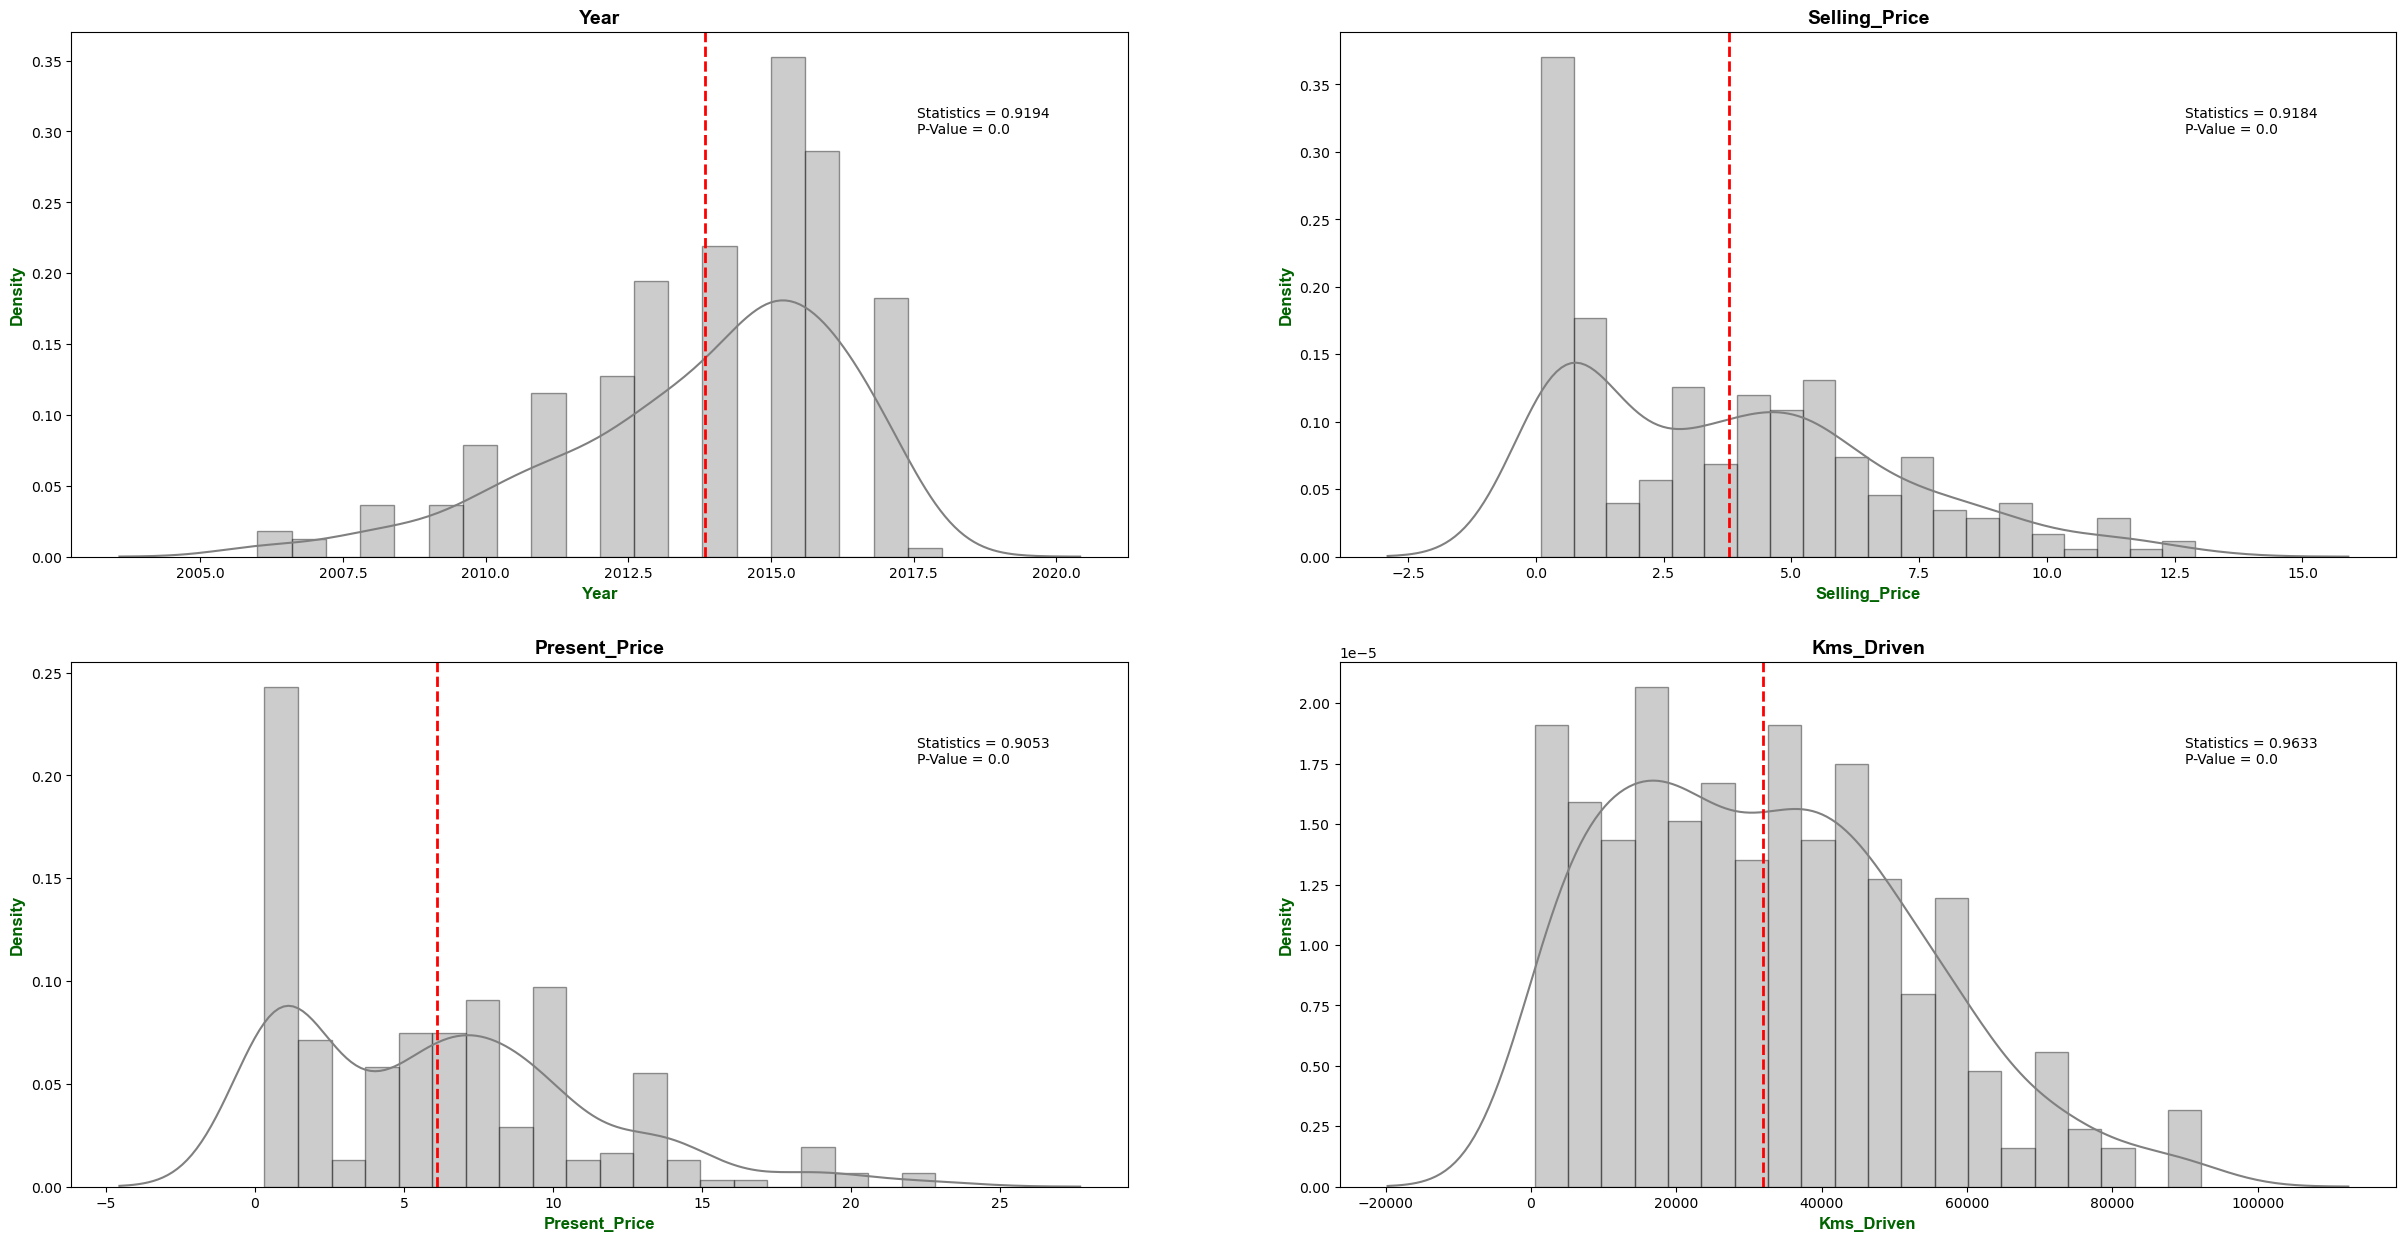

In [162]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

figure, axis = plt.subplots(2, 2, figsize = (30, 15))

i = 0
j = 0

for field in num_f:
    
    sns.distplot(no_ol_df[field], kde = True, bins = 20, color = "gray", hist_kws = dict(linewidth = 1, edgecolor = "k"), ax = axis[i, j])
    axis[i, j].axvline(no_ol_df[field].mean(), color = "r", ls = "--", lw = 2)
                
    axis[i, j].set_title(field, fontdict = title_font)
    axis[i, j].set_xlabel(field, fontdict = axes_font)
    axis[i, j].set_ylabel("Density", fontdict = axes_font)
    axis[i, j].annotate(f"Statistics = {round(shapiro(no_ol_df[field])[0], 4)}\nP-Value = {round(shapiro(no_ol_df[field])[1], 4)}",
               xy = (0.8, 0.8), xycoords = "axes fraction", fontsize = 10, horizontalalignment = "left", verticalalignment = "bottom")
    
    if ((j + 1) % 2) != 0:
        j += 1
    
    else:
        j = 0
        i += 1
  
plt.show()

[Project Content](#0)

### 15. Seperating Data into Two Parts of Train and Test <a id = 15></a> 

In [163]:
no_ol_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_int,Seller_Type_int,Transmission_int
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1,0,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0,0,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0,0,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1,0,0


In [164]:
x_t, x_d, y_t, y_d = f_train_dev_split(no_ol_df[num_f + cat_f_int], "Selling_Price")

Train (x) dataset shape is:      (219, 7)
Train (y) dataset shape is:      (219,)
Dev (x) dataset shape is:       (55, 7)
Dev (y) dataset shape is:       (55,)


In [165]:
x_t_corr, x_d_corr, y_t_corr, y_d_corr = f_train_dev_split(no_ol_df[correlated_f + ["Selling_Price"]], "Selling_Price")

Train (x) dataset shape is:      (219, 6)
Train (y) dataset shape is:      (219,)
Dev (x) dataset shape is:       (55, 6)
Dev (y) dataset shape is:       (55,)


[Project Content](#0)

### 16. Modelling (Linear Regression) <a id = 16></a> 

In [268]:
f_linear_regression([x_t, y_t], [x_d, y_d])

Coefficients values:
    * Seller_Type_int : -1.46
    * Kms_Driven : -0.0
    * Transmission_int : 0.14
    * Owner : 0.23
    * Year : 0.3
    * Present_Price : 0.44
    * Fuel_Type_int : 0.99

Inetrcept: -598.314221554429



,Train,Dev
R Squared,0.865454,0.808194


In [269]:
f_linear_regression([x_t_corr, y_t_corr], [x_d_corr, y_d_corr])

Coefficients values:
    * Seller_Type_int : -1.46
    * Kms_Driven : -0.0
    * Transmission_int : 0.13
    * Year : 0.29
    * Present_Price : 0.44
    * Fuel_Type_int : 0.99

Inetrcept: -590.177174089679



,Train,Dev
R Squared,0.865269,0.806779


[Project Content](#0)

### 19. Hyper Parameter Optimization (Linear Regression) <a id = 19></a> 

[Project Content](#0)